## 1.0 路径读取 数据验证  Hours_P

### 1.1 路径读取

In [151]:
import pathlib

path = pathlib.Path().resolve()

path

PosixPath('/Users/tuna/Desktop/p/2')

### 1.2 数据验证

In [152]:
import pandas as pd

HoursP_1 = pd.read_csv( path / 'SouthWest_HoursP_1.csv' )
HoursP_2 = pd.read_csv( path / 'SouthWest_HoursP_2.csv' )
HoursP_3 = pd.read_csv( path / 'SouthWest_HoursP_3.csv' )

In [153]:
# 检查三个数据框是否完全相同
if HoursP_1.equals(HoursP_2) and HoursP_1.equals(HoursP_3) and HoursP_2.equals(HoursP_3):
    print("三个数据框完全相同")
else:
    print("三个数据框不完全相同")

三个数据框完全相同


### 1.3 数据读取

In [154]:
HoursP = HoursP_1

## 2.0 基础取值 0 - 1000  HoursP_1000

In [155]:
HoursP.loc[HoursP['crain'] < 0, 'crain'] = 0

HoursP_1000 = HoursP[HoursP['crain'] <= 1000]

HoursP_1000

,time,station,x,y,crain
0,2008-01-01 00:00:00,56045.0,99.900000,33.966667,0.0
1,2008-01-01 01:00:00,56045.0,99.900000,33.966667,0.0
2,2008-01-01 02:00:00,56045.0,99.900000,33.966667,0.0
3,2008-01-01 03:00:00,56045.0,99.900000,33.966667,0.0
4,2008-01-01 04:00:00,56045.0,99.900000,33.966667,0.0
...,...,...,...,...,...
14347158,2016-03-06 03:00:00,56851.0,100.516667,25.033333,0.0
14347159,2016-03-06 04:00:00,56851.0,100.516667,25.033333,0.0
14347160,2016-03-06 05:00:00,56851.0,100.516667,25.033333,0.0
14347161,2016-03-06 06:00:00,56851.0,100.516667,25.033333,0.0


In [156]:
# 提取出降事件 绘制箱形图

selected_rows = HoursP_1000[HoursP_1000['crain'] != 0]

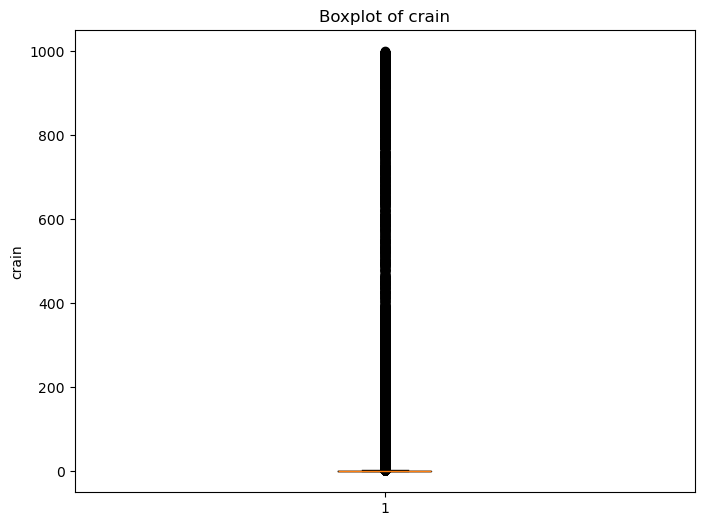

                         time  station           x          y  crain  \
0         2008-01-01 00:00:00  56045.0   99.900000  33.966667    0.0   
1         2008-01-01 01:00:00  56045.0   99.900000  33.966667    0.0   
2         2008-01-01 02:00:00  56045.0   99.900000  33.966667    0.0   
3         2008-01-01 03:00:00  56045.0   99.900000  33.966667    0.0   
4         2008-01-01 04:00:00  56045.0   99.900000  33.966667    0.0   
...                       ...      ...         ...        ...    ...   
14347158  2016-03-06 03:00:00  56851.0  100.516667  25.033333    0.0   
14347159  2016-03-06 04:00:00  56851.0  100.516667  25.033333    0.0   
14347160  2016-03-06 05:00:00  56851.0  100.516667  25.033333    0.0   
14347161  2016-03-06 06:00:00  56851.0  100.516667  25.033333    0.0   
14347162  2016-03-06 07:00:00  56851.0  100.516667  25.033333    0.0   

          ErrorCode  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...

/var/folders/qf/6td8xpjs0dx3h8n6_0_j266c0000gn/T/ipykernel_19797/1630940122.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HoursP_1000['ErrorCode'] = np.where(HoursP_1000['crain'] > upper_bound, 1, 0)


In [157]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制箱形图
plt.figure(figsize=(8, 6))
plt.boxplot(selected_rows['crain'])
plt.title('Boxplot of crain')
plt.ylabel('crain')

# 显示箱线图
plt.show()

# 计算箱线图中的异常值
Q1 = np.percentile(selected_rows['crain'], 25)
Q3 = np.percentile(selected_rows['crain'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 在数据框中新建一列 ErrorCode
HoursP_1000['ErrorCode'] = np.where(HoursP_1000['crain'] > upper_bound, 1, 0)

print(HoursP_1000)

In [158]:
print("极大异常值行数：",(HoursP_1000['ErrorCode'] == 1).sum())
print("上限：",HoursP_1000.loc[HoursP_1000['ErrorCode'] == 1, 'crain'].max())
print("下限：",HoursP_1000.loc[HoursP_1000['ErrorCode'] == 1, 'crain'].min())


极大异常值行数： 101878
上限： 999.9176
下限： 2.5773377


## 3.0 匹配降水数据  HoursP_merged

### 3.1 添加 date 列

In [159]:
# 将'time'列转换为日期时间类型
HoursP_1000['time'] = pd.to_datetime(HoursP_1000['time'])

# 根据条件创建'date'列
HoursP_1000['date'] = HoursP_1000['time'].dt.date  # 先默认取日期

# 根据条件更新'date'列
mask = (HoursP_1000['time'].dt.hour >= 20) & (HoursP_1000['time'].dt.hour <= 23)
HoursP_1000.loc[mask, 'date'] = HoursP_1000['time'].dt.date + pd.Timedelta(days=1)

HoursP_1000

/var/folders/qf/6td8xpjs0dx3h8n6_0_j266c0000gn/T/ipykernel_19797/2506367720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HoursP_1000['time'] = pd.to_datetime(HoursP_1000['time'])
/var/folders/qf/6td8xpjs0dx3h8n6_0_j266c0000gn/T/ipykernel_19797/2506367720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HoursP_1000['date'] = HoursP_1000['time'].dt.date  # 先默认取日期


,time,station,x,y,crain,ErrorCode,date
0,2008-01-01 00:00:00,56045.0,99.900000,33.966667,0.0,0,2008-01-01
1,2008-01-01 01:00:00,56045.0,99.900000,33.966667,0.0,0,2008-01-01
2,2008-01-01 02:00:00,56045.0,99.900000,33.966667,0.0,0,2008-01-01
3,2008-01-01 03:00:00,56045.0,99.900000,33.966667,0.0,0,2008-01-01
4,2008-01-01 04:00:00,56045.0,99.900000,33.966667,0.0,0,2008-01-01
...,...,...,...,...,...,...,...
14347158,2016-03-06 03:00:00,56851.0,100.516667,25.033333,0.0,0,2016-03-06
14347159,2016-03-06 04:00:00,56851.0,100.516667,25.033333,0.0,0,2016-03-06
14347160,2016-03-06 05:00:00,56851.0,100.516667,25.033333,0.0,0,2016-03-06
14347161,2016-03-06 06:00:00,56851.0,100.516667,25.033333,0.0,0,2016-03-06


### 3.2 读入降水数据

In [160]:
DailyP = pd.read_csv( path / 'DailyP.csv')[['station','date','Prcp']]

DailyP

,station,date,Prcp
0,55279,2008-01-01,0.0
1,55279,2008-01-02,0.0
2,55279,2008-01-03,0.0
3,55279,2008-01-04,0.0
4,55279,2008-01-05,0.1
...,...,...,...
608975,57105,2019-12-27,0.0
608976,57105,2019-12-28,0.0
608977,57105,2019-12-29,0.0
608978,57105,2019-12-30,0.0


In [161]:
# 将 station 列转换为字符串，保留整数部分
HoursP_1000['station'] = HoursP_1000['station'].astype(str).str.split('.').str[0]

# 将 DailyP 中的 station 列转换为字符串，保留整数部分
DailyP['station'] = DailyP['station'].astype(str).str.split('.').str[0]

# 将 date 列转换为日期格式
HoursP_1000['date'] = pd.to_datetime(HoursP_1000['date'])
DailyP['date'] = pd.to_datetime(DailyP['date'])

# 将 DailyP 中的 Prcp 值匹配到 HoursP_1000 中
HoursP_merged = pd.merge(HoursP_1000, DailyP, on=['station', 'date'], how='left')

HoursP_merged

/var/folders/qf/6td8xpjs0dx3h8n6_0_j266c0000gn/T/ipykernel_19797/2264906102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HoursP_1000['station'] = HoursP_1000['station'].astype(str).str.split('.').str[0]
/var/folders/qf/6td8xpjs0dx3h8n6_0_j266c0000gn/T/ipykernel_19797/2264906102.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HoursP_1000['date'] = pd.to_datetime(HoursP_1000['date'])


,time,station,x,y,crain,ErrorCode,date,Prcp
0,2008-01-01 00:00:00,56045,99.900000,33.966667,0.0,0,2008-01-01,0.0
1,2008-01-01 01:00:00,56045,99.900000,33.966667,0.0,0,2008-01-01,0.0
2,2008-01-01 02:00:00,56045,99.900000,33.966667,0.0,0,2008-01-01,0.0
3,2008-01-01 03:00:00,56045,99.900000,33.966667,0.0,0,2008-01-01,0.0
4,2008-01-01 04:00:00,56045,99.900000,33.966667,0.0,0,2008-01-01,0.0
...,...,...,...,...,...,...,...,...
14335867,2016-03-06 03:00:00,56851,100.516667,25.033333,0.0,0,2016-03-06,0.0
14335868,2016-03-06 04:00:00,56851,100.516667,25.033333,0.0,0,2016-03-06,0.0
14335869,2016-03-06 05:00:00,56851,100.516667,25.033333,0.0,0,2016-03-06,0.0
14335870,2016-03-06 06:00:00,56851,100.516667,25.033333,0.0,0,2016-03-06,0.0


In [162]:
#HoursP_1000.to_csv( path / 'HoursP_1000.csv')
#HoursP_merged.to_csv( path / 'HoursP_merged.csv')

## 4.0 ErrorCode = 1 数据分析

### 4.1 crain - C_P 散点图

In [163]:
# 新建一列 C_P，计算 crain 列减去 Prcp 列的结果
HoursP_merged['C_P'] = HoursP_merged['crain'] - HoursP_merged['Prcp']

HoursP_merged


,time,station,x,y,crain,ErrorCode,date,Prcp,C_P
0,2008-01-01 00:00:00,56045,99.900000,33.966667,0.0,0,2008-01-01,0.0,0.0
1,2008-01-01 01:00:00,56045,99.900000,33.966667,0.0,0,2008-01-01,0.0,0.0
2,2008-01-01 02:00:00,56045,99.900000,33.966667,0.0,0,2008-01-01,0.0,0.0
3,2008-01-01 03:00:00,56045,99.900000,33.966667,0.0,0,2008-01-01,0.0,0.0
4,2008-01-01 04:00:00,56045,99.900000,33.966667,0.0,0,2008-01-01,0.0,0.0
...,...,...,...,...,...,...,...,...,...
14335867,2016-03-06 03:00:00,56851,100.516667,25.033333,0.0,0,2016-03-06,0.0,0.0
14335868,2016-03-06 04:00:00,56851,100.516667,25.033333,0.0,0,2016-03-06,0.0,0.0
14335869,2016-03-06 05:00:00,56851,100.516667,25.033333,0.0,0,2016-03-06,0.0,0.0
14335870,2016-03-06 06:00:00,56851,100.516667,25.033333,0.0,0,2016-03-06,0.0,0.0


In [164]:
error_rows = HoursP_merged[HoursP_merged['ErrorCode'] == 1]

error_rows

,time,station,x,y,crain,ErrorCode,date,Prcp,C_P
3768,2008-06-06 00:00:00,56045,99.900000,33.966667,4.469716,1,2008-06-06,9.3,-4.830284
3966,2008-06-14 06:00:00,56045,99.900000,33.966667,3.623375,1,2008-06-14,9.5,-5.876625
4142,2008-06-21 14:00:00,56045,99.900000,33.966667,4.829402,1,2008-06-21,6.9,-2.070598
4166,2008-06-22 14:00:00,56045,99.900000,33.966667,2.777179,1,2008-06-22,16.7,-13.922821
4167,2008-06-22 15:00:00,56045,99.900000,33.966667,2.792292,1,2008-06-22,16.7,-13.907708
...,...,...,...,...,...,...,...,...,...
14332758,2016-02-24 12:00:00,56755,100.400000,25.383333,2.631946,1,2016-02-24,6.4,-3.768054
14333514,2016-01-27 13:00:00,56756,100.583333,25.483333,3.587311,1,2016-01-27,0.8,2.787311
14334185,2016-02-24 12:00:00,56756,100.583333,25.483333,3.220262,1,2016-02-24,6.9,-3.679738
14334942,2016-01-27 14:00:00,56851,100.516667,25.033333,3.181920,1,2016-01-27,0.0,3.181920


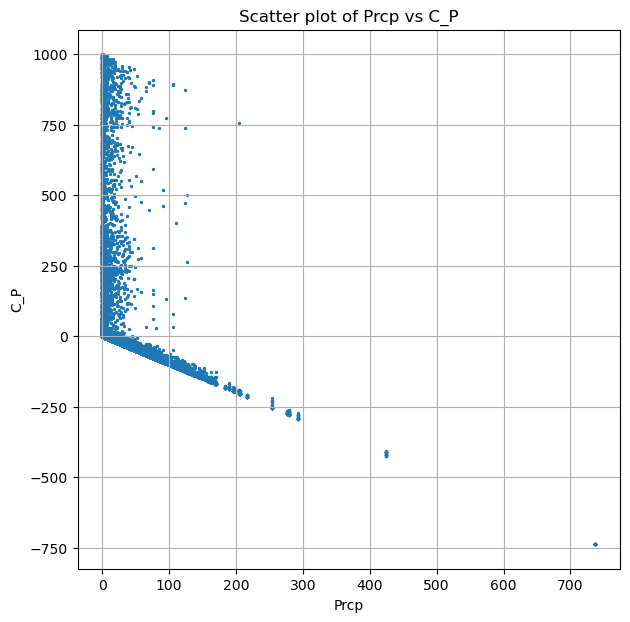

In [165]:
plt.figure(figsize=(7, 7))
plt.scatter(HoursP_merged['Prcp'], HoursP_merged['C_P'], s=2)
plt.title('Scatter plot of Prcp vs C_P')
plt.xlabel('Prcp')
plt.ylabel('C_P')
plt.grid(True)
plt.show()

## 5.0 分类 ErrorCode = 1 / ErrorCode = 2

In [166]:
# 导入 pandas 库
import pandas as pd

# 将 ErrorCode 列为1且 C_P 列小于等于0 的行的 ErrorCode 值改为2
HoursP_merged.loc[(HoursP_merged['ErrorCode'] == 1) & (HoursP_merged['C_P'] <= 0), 'ErrorCode'] = 2

print(((HoursP_merged['ErrorCode'] == 1).sum()) + ((HoursP_merged['ErrorCode'] == 2).sum()))

101878


#### 5.1 ErrorCode = 1

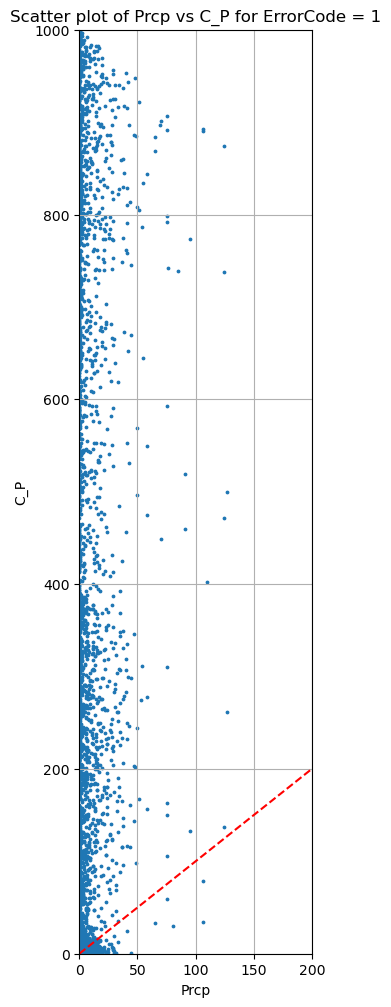

In [167]:
# 选出 ErrorCode 为 1 的行
error_rows_1 = HoursP_merged[HoursP_merged['ErrorCode'] == 1]

plt.figure(figsize=(3, 12))
plt.scatter(error_rows_1['Prcp'], error_rows_1['C_P'], s=3)  # 调换 x 和 y 轴的顺序
plt.plot([0, 250], [0, 250], color='red', linestyle='--', label='x = y')  # 添加 x=y 的线
plt.title('Scatter plot of Prcp vs C_P for ErrorCode = 1')  # 调整标题
plt.xlabel('Prcp')  # 调整 x 轴标签
plt.ylabel('C_P')  # 调整 y 轴标签
plt.xlim(0, 200)  # 设置 x 轴范围
plt.ylim(0, 1000)  # 设置 y 轴范围
plt.grid(True)
plt.show()



##### 5.1.1 建立 Solving code

In [168]:
# 新建 SolvingCode 列，所有行赋值为 0
HoursP_merged['SolvingCode'] = 0

# 重新排列列的顺序
HoursP_merged = HoursP_merged.reindex(columns=['station', 'x', 'y', 'time', 'date', 'crain', 'Prcp', 'C_P', 'ErrorCode', 'SolvingCode'])

# 打印修改后的 DataFrame
print(HoursP_merged)

         station           x          y                time       date  crain  \
0          56045   99.900000  33.966667 2008-01-01 00:00:00 2008-01-01    0.0   
1          56045   99.900000  33.966667 2008-01-01 01:00:00 2008-01-01    0.0   
2          56045   99.900000  33.966667 2008-01-01 02:00:00 2008-01-01    0.0   
3          56045   99.900000  33.966667 2008-01-01 03:00:00 2008-01-01    0.0   
4          56045   99.900000  33.966667 2008-01-01 04:00:00 2008-01-01    0.0   
...          ...         ...        ...                 ...        ...    ...   
14335867   56851  100.516667  25.033333 2016-03-06 03:00:00 2016-03-06    0.0   
14335868   56851  100.516667  25.033333 2016-03-06 04:00:00 2016-03-06    0.0   
14335869   56851  100.516667  25.033333 2016-03-06 05:00:00 2016-03-06    0.0   
14335870   56851  100.516667  25.033333 2016-03-06 06:00:00 2016-03-06    0.0   
14335871   56851  100.516667  25.033333 2016-03-06 07:00:00 2016-03-06    0.0   

          Prcp  C_P  ErrorC

##### 5.1.2 第一轮清理 HoursP_merged_1

In [169]:
# 创建原始数据框的副本
HoursP_merged_1 = HoursP_merged.copy()

# 根据 C_P 筛选
# 选择 C_P 大于 200 的行，并设置 SolvingCode 列为 1
HoursP_merged_1.loc[(HoursP_merged_1['ErrorCode'] == 1) & (HoursP_merged_1['C_P'] > 200), 'SolvingCode'] = 1

# 打印修改后的新数据框
print(HoursP_merged_1)

         station           x          y                time       date  crain  \
0          56045   99.900000  33.966667 2008-01-01 00:00:00 2008-01-01    0.0   
1          56045   99.900000  33.966667 2008-01-01 01:00:00 2008-01-01    0.0   
2          56045   99.900000  33.966667 2008-01-01 02:00:00 2008-01-01    0.0   
3          56045   99.900000  33.966667 2008-01-01 03:00:00 2008-01-01    0.0   
4          56045   99.900000  33.966667 2008-01-01 04:00:00 2008-01-01    0.0   
...          ...         ...        ...                 ...        ...    ...   
14335867   56851  100.516667  25.033333 2016-03-06 03:00:00 2016-03-06    0.0   
14335868   56851  100.516667  25.033333 2016-03-06 04:00:00 2016-03-06    0.0   
14335869   56851  100.516667  25.033333 2016-03-06 05:00:00 2016-03-06    0.0   
14335870   56851  100.516667  25.033333 2016-03-06 06:00:00 2016-03-06    0.0   
14335871   56851  100.516667  25.033333 2016-03-06 07:00:00 2016-03-06    0.0   

          Prcp  C_P  ErrorC

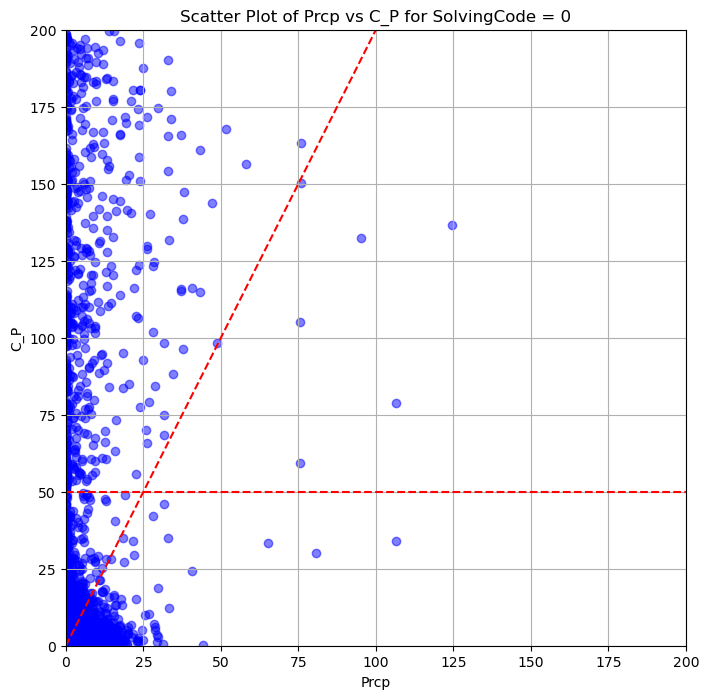

In [170]:
import matplotlib.pyplot as plt

# 筛选后的剩余数据
# 选择 ErrorCode = 1  且  SolvingCode = 0 的行
filtered_data = HoursP_merged_1[(HoursP_merged_1['ErrorCode'] == 1) & (HoursP_merged_1['SolvingCode'] == 0)]

# 提取 Prcp 和 C_P 列数据
prcp_data = filtered_data['Prcp']
crain_data = filtered_data['C_P']

# 创建散点图
plt.figure(figsize=(8, 8))
plt.scatter(prcp_data, crain_data, color='blue', alpha=0.5)
plt.title('Scatter Plot of Prcp vs C_P for SolvingCode = 0')
plt.xlabel('Prcp')
plt.ylabel('C_P')
plt.xlim(0, 200)  # 设置 x 轴范围
plt.ylim(0, 200)  # 设置 y 轴范围
plt.grid(True)

# 添加直线 y = 2x
plt.plot([0, 200], [0, 400], color='red', linestyle='--')

plt.axhline(y=50, color='red', linestyle='--')

plt.show()


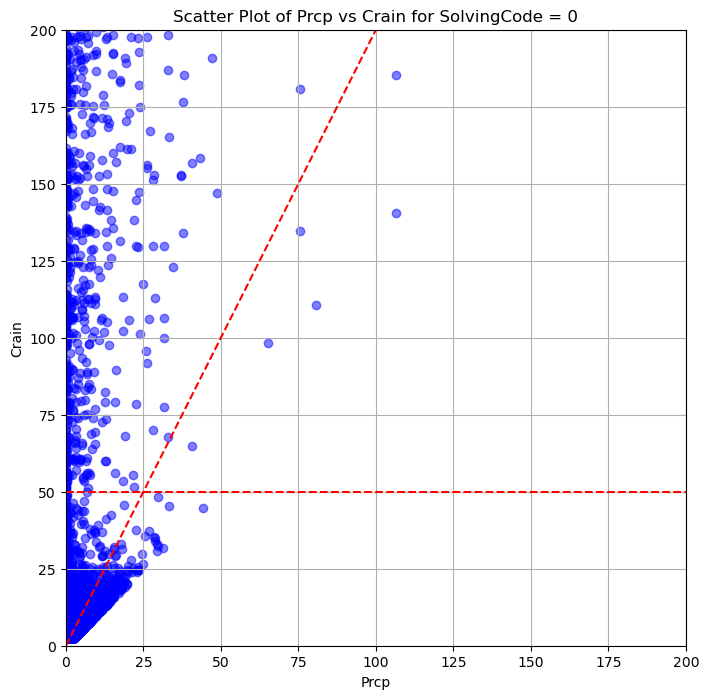

In [171]:
import matplotlib.pyplot as plt

# 筛选后的剩余数据
# 选择 ErrorCode = 1  且  SolvingCode = 0 的行
filtered_data = HoursP_merged_1[(HoursP_merged_1['ErrorCode'] == 1) & (HoursP_merged_1['SolvingCode'] == 0)]

# 提取 Prcp 和 crain 列数据
prcp_data = filtered_data['Prcp']
crain_data = filtered_data['crain']  # 将 y 轴数据改为 'crain' 列的数据

# 创建散点图
plt.figure(figsize=(8, 8))
plt.scatter(prcp_data, crain_data, color='blue', alpha=0.5)
plt.title('Scatter Plot of Prcp vs Crain for SolvingCode = 0')
plt.xlabel('Prcp')
plt.ylabel('Crain')  # y 轴标签仍为 "Crain"
plt.xlim(0, 200)  # 设置 x 轴范围
plt.ylim(0, 200)  # 设置 y 轴范围
plt.grid(True)

# 添加直线 y = 2x
plt.plot([0, 200], [0, 400], color='red', linestyle='--')

plt.axhline(y=50, color='red', linestyle='--')

plt.show()


##### 5.1.3 第二轮清理 HoursP_merged_2

In [172]:
# 创建原始数据框的副本
HoursP_merged_2 = HoursP_merged_1.copy()

# 根据 C_P 筛选
# 选择 C_P 大于 200 的行，并设置 SolvingCode 列为 1
HoursP_merged_2.loc[(HoursP_merged_2['C_P'] > 50) & 
                             (HoursP_merged_2['C_P'] > 2 * HoursP_merged_2['Prcp']) &
                             (HoursP_merged_2['ErrorCode'] == 1) & 
                             (HoursP_merged_2['SolvingCode'] == 0), 'SolvingCode'] = 1

# 打印修改后的新数据框
print(HoursP_merged_2)

         station           x          y                time       date  crain  \
0          56045   99.900000  33.966667 2008-01-01 00:00:00 2008-01-01    0.0   
1          56045   99.900000  33.966667 2008-01-01 01:00:00 2008-01-01    0.0   
2          56045   99.900000  33.966667 2008-01-01 02:00:00 2008-01-01    0.0   
3          56045   99.900000  33.966667 2008-01-01 03:00:00 2008-01-01    0.0   
4          56045   99.900000  33.966667 2008-01-01 04:00:00 2008-01-01    0.0   
...          ...         ...        ...                 ...        ...    ...   
14335867   56851  100.516667  25.033333 2016-03-06 03:00:00 2016-03-06    0.0   
14335868   56851  100.516667  25.033333 2016-03-06 04:00:00 2016-03-06    0.0   
14335869   56851  100.516667  25.033333 2016-03-06 05:00:00 2016-03-06    0.0   
14335870   56851  100.516667  25.033333 2016-03-06 06:00:00 2016-03-06    0.0   
14335871   56851  100.516667  25.033333 2016-03-06 07:00:00 2016-03-06    0.0   

          Prcp  C_P  ErrorC

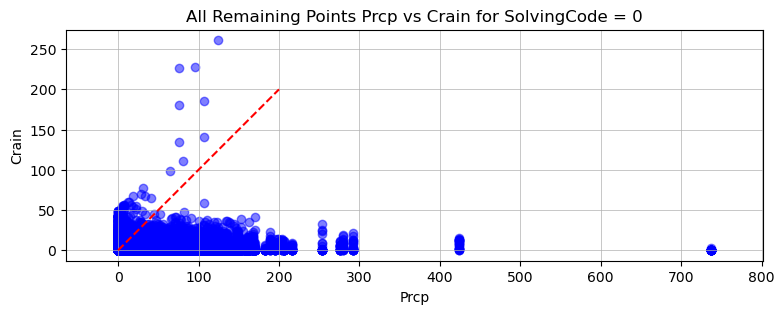

In [173]:
import matplotlib.pyplot as plt

# 筛选后的剩余数据
# 选择 ErrorCode = 1 且 SolvingCode = 0 的行
filtered_data = HoursP_merged_2[(HoursP_merged_2['SolvingCode'] == 0)]

# 提取 Prcp 和 crain 列数据
prcp_data = filtered_data['Prcp']
crain_data = filtered_data['crain']  # 将 y 轴数据改为 'crain' 列的数据

# 创建散点图
plt.figure(figsize=(9, 3))
plt.scatter(prcp_data, crain_data, color='blue', alpha=0.5)
plt.title('All Remaining Points Prcp vs Crain for SolvingCode = 0')
plt.xlabel('Prcp')
plt.ylabel('Crain')  # y 轴标签仍为 "Crain"
plt.xlim(0, 900)  # 设置 x 轴范围
plt.ylim(0, None)   # 设置 y 轴范围

# 设置 x 和 y 轴的刻度跨度相同
plt.axis('equal')

# 设置网格线的宽度和样式
plt.grid(True, which='both', axis='both', linestyle='-', linewidth=0.5)

# 添加直线 y = 2x
plt.plot([0, 200], [0, 200], color='red', linestyle='--')

plt.show()


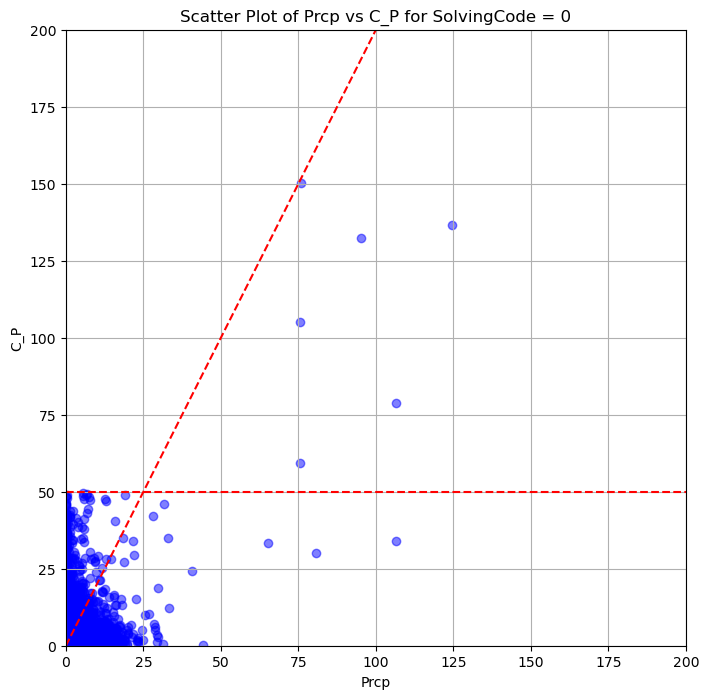

Prcp 大于 50 的，目前基本可视为正常值


In [174]:
# 全部

import matplotlib.pyplot as plt

# 筛选后的剩余数据
# 选择 ErrorCode = 1  且  SolvingCode = 0 的行
filtered_data = HoursP_merged_2[(HoursP_merged_2['ErrorCode'] == 1) & (HoursP_merged_2['SolvingCode'] == 0)]

# 提取 Prcp 和 C_P 列数据
prcp_data = filtered_data['Prcp']
crain_data = filtered_data['C_P']

# 创建散点图
plt.figure(figsize=(8, 8))
plt.scatter(prcp_data, crain_data, color='blue', alpha=0.5)
plt.title('Scatter Plot of Prcp vs C_P for SolvingCode = 0')
plt.xlabel('Prcp')
plt.ylabel('C_P')
plt.xlim(0, 200)  # 设置 x 轴范围
plt.ylim(0, 200)  # 设置 y 轴范围
plt.grid(True)

# 添加直线 y = 2x
plt.plot([0, 200], [0, 400], color='red', linestyle='--')


plt.axhline(y=50, color='red', linestyle='--')

plt.show()

print('Prcp 大于 50 的，目前基本可视为正常值')

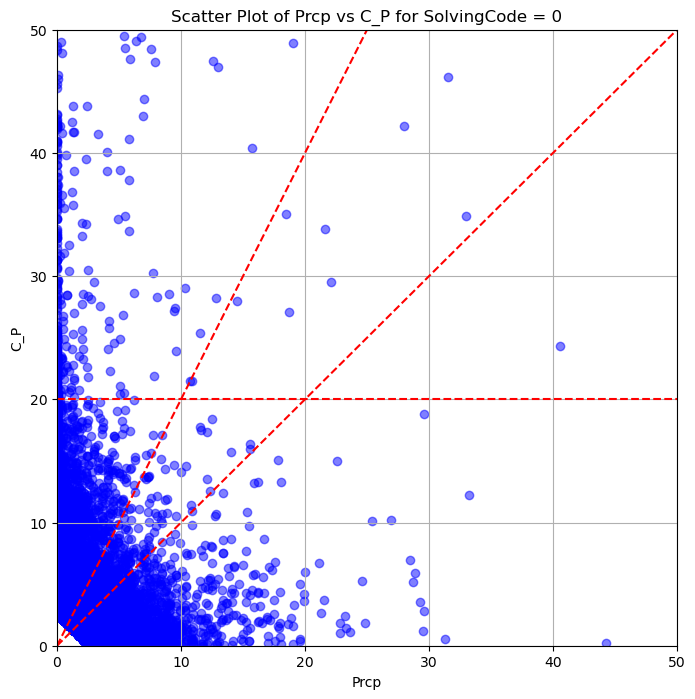

In [175]:
# Prcp < 50  & C_P < 50

import matplotlib.pyplot as plt

# 筛选后的剩余数据
# 选择 ErrorCode = 1  且  SolvingCode = 0 的行
filtered_data = HoursP_merged_2[(HoursP_merged_2['ErrorCode'] == 1) & (HoursP_merged_2['SolvingCode'] == 0)]

# 提取 Prcp 和 C_P 列数据
prcp_data = filtered_data['Prcp']
crain_data = filtered_data['C_P']

# 创建散点图
plt.figure(figsize=(8, 8))
plt.scatter(prcp_data, crain_data, color='blue', alpha=0.5)
plt.title('Scatter Plot of Prcp vs C_P for SolvingCode = 0')
plt.xlabel('Prcp')
plt.ylabel('C_P')
plt.xlim(0, 50)  # 设置 x 轴范围
plt.ylim(0, 50)  # 设置 y 轴范围
plt.grid(True)

# 添加直线 y = 2x
plt.plot([0, 200], [0, 400], color='red', linestyle='--')

plt.plot([0, 200], [0, 200], color='red', linestyle='--')


plt.axhline(y=20, color='red', linestyle='--')

plt.show()


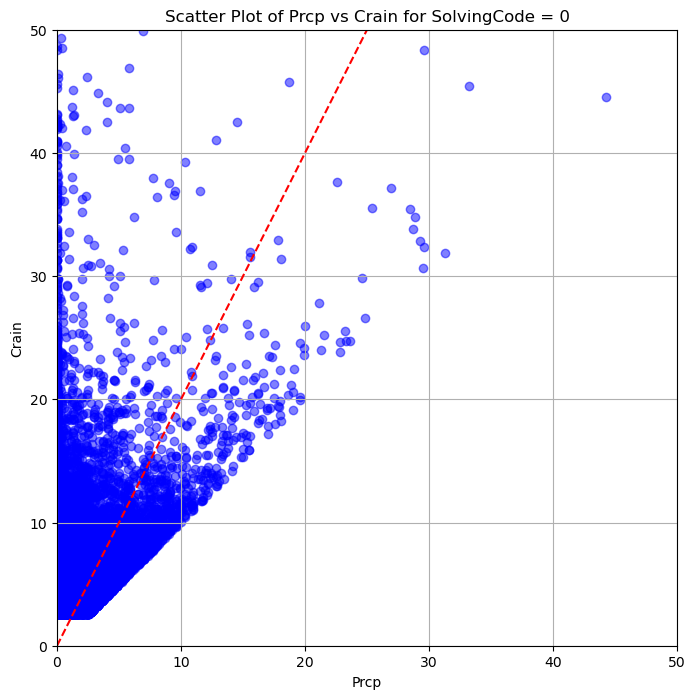

In [176]:
import matplotlib.pyplot as plt

# 筛选后的剩余数据
# 选择 ErrorCode = 1  且  SolvingCode = 0 的行
filtered_data = HoursP_merged_2[(HoursP_merged_2['ErrorCode'] == 1) & (HoursP_merged_2['SolvingCode'] == 0)]

# 提取 Prcp 和 crain 列数据
prcp_data = filtered_data['Prcp']
crain_data = filtered_data['crain']  # 将 y 轴数据改为 'crain' 列的数据

# 创建散点图
plt.figure(figsize=(8, 8))
plt.scatter(prcp_data, crain_data, color='blue', alpha=0.5)
plt.title('Scatter Plot of Prcp vs Crain for SolvingCode = 0')
plt.xlabel('Prcp')
plt.ylabel('Crain')  # y 轴标签仍为 "Crain"
plt.xlim(0, 50)  # 设置 x 轴范围
plt.ylim(0, 50)  # 设置 y 轴范围
plt.grid(True)

# 添加直线 y = 2x
plt.plot([0, 200], [0, 400], color='red', linestyle='--')


# plt.axhline(y=50, color='red', linestyle='--')

plt.show() 

##### 5.1.4 第三轮清理 HoursP_merged_3

In [178]:
# 创建原始数据框的副本
HoursP_merged_3 = HoursP_merged_2.copy()

# 根据 crain 筛选
# 选择 crain 大于 10 且 Prcp 为 0 行，并设置 SolvingCode 列为 1

HoursP_merged_3.loc[(HoursP_merged_3['Prcp'] == 0 ) & 
                             (HoursP_merged_3['crain'] >= 10 ) &
                             (HoursP_merged_3['ErrorCode'] == 1) & 
                             (HoursP_merged_3['SolvingCode'] == 0), 'SolvingCode'] = 1

# 打印修改后的新数据框
print(HoursP_merged_3)

         station           x          y                time       date  crain  \
0          56045   99.900000  33.966667 2008-01-01 00:00:00 2008-01-01    0.0   
1          56045   99.900000  33.966667 2008-01-01 01:00:00 2008-01-01    0.0   
2          56045   99.900000  33.966667 2008-01-01 02:00:00 2008-01-01    0.0   
3          56045   99.900000  33.966667 2008-01-01 03:00:00 2008-01-01    0.0   
4          56045   99.900000  33.966667 2008-01-01 04:00:00 2008-01-01    0.0   
...          ...         ...        ...                 ...        ...    ...   
14335867   56851  100.516667  25.033333 2016-03-06 03:00:00 2016-03-06    0.0   
14335868   56851  100.516667  25.033333 2016-03-06 04:00:00 2016-03-06    0.0   
14335869   56851  100.516667  25.033333 2016-03-06 05:00:00 2016-03-06    0.0   
14335870   56851  100.516667  25.033333 2016-03-06 06:00:00 2016-03-06    0.0   
14335871   56851  100.516667  25.033333 2016-03-06 07:00:00 2016-03-06    0.0   

          Prcp  C_P  ErrorC

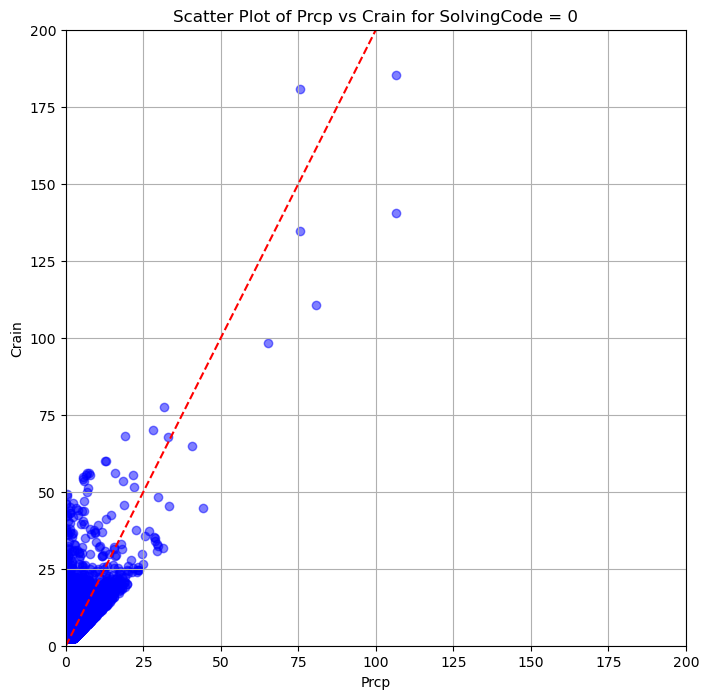

In [179]:
import matplotlib.pyplot as plt

# 筛选后的剩余数据
# 选择 ErrorCode = 1  且  SolvingCode = 0 的行
filtered_data = HoursP_merged_3[(HoursP_merged_3['ErrorCode'] == 1) & (HoursP_merged_3['SolvingCode'] == 0)]

# 提取 Prcp 和 crain 列数据
prcp_data = filtered_data['Prcp']
crain_data = filtered_data['crain']  # 将 y 轴数据改为 'crain' 列的数据

# 创建散点图
plt.figure(figsize=(8, 8))
plt.scatter(prcp_data, crain_data, color='blue', alpha=0.5)
plt.title('Scatter Plot of Prcp vs Crain for SolvingCode = 0')
plt.xlabel('Prcp')
plt.ylabel('Crain')  # y 轴标签仍为 "Crain"
plt.xlim(0, 200)  # 设置 x 轴范围
plt.ylim(0, 200)  # 设置 y 轴范围
plt.grid(True)

# 添加直线 y = 2x
plt.plot([0, 200], [0, 400], color='red', linestyle='--')


# plt.axhline(y=50, color='red', linestyle='--')

plt.show() 

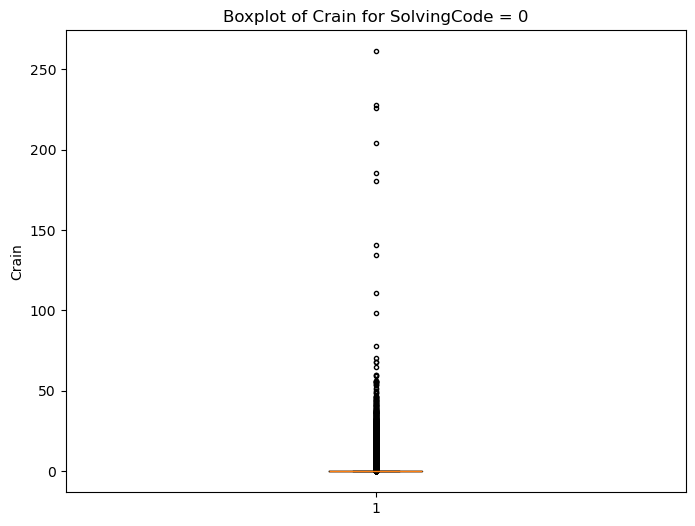

In [180]:
import matplotlib.pyplot as plt

# 筛选出 SolvingCode 为 0 的行
filtered_data = HoursP_merged_3[HoursP_merged_3['SolvingCode'] == 0]

# 提取 crain 列数据
crain_data = filtered_data['crain']

# 创建箱形图，并调整极大异常值标示点的大小
plt.figure(figsize=(8, 6))
plt.boxplot(crain_data, flierprops=dict(marker='o', markersize=3))  # 设置极大异常值标示点的大小为 10
plt.title('Boxplot of Crain for SolvingCode = 0')
plt.ylabel('Crain')
plt.show()



In [181]:
HoursP_fix = HoursP_merged_3[HoursP_merged_3['SolvingCode'] == 0]

HoursP_fix

,station,x,y,time,date,crain,Prcp,C_P,ErrorCode,SolvingCode
0,56045,99.900000,33.966667,2008-01-01 00:00:00,2008-01-01,0.0,0.0,0.0,0,0
1,56045,99.900000,33.966667,2008-01-01 01:00:00,2008-01-01,0.0,0.0,0.0,0,0
2,56045,99.900000,33.966667,2008-01-01 02:00:00,2008-01-01,0.0,0.0,0.0,0,0
3,56045,99.900000,33.966667,2008-01-01 03:00:00,2008-01-01,0.0,0.0,0.0,0,0
4,56045,99.900000,33.966667,2008-01-01 04:00:00,2008-01-01,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
14335867,56851,100.516667,25.033333,2016-03-06 03:00:00,2016-03-06,0.0,0.0,0.0,0,0
14335868,56851,100.516667,25.033333,2016-03-06 04:00:00,2016-03-06,0.0,0.0,0.0,0,0
14335869,56851,100.516667,25.033333,2016-03-06 05:00:00,2016-03-06,0.0,0.0,0.0,0,0
14335870,56851,100.516667,25.033333,2016-03-06 06:00:00,2016-03-06,0.0,0.0,0.0,0,0


In [182]:
HoursP_fix.to_csv( path / 'HoursP_fix.csv')

#### 5.2 ErrorCode = 2

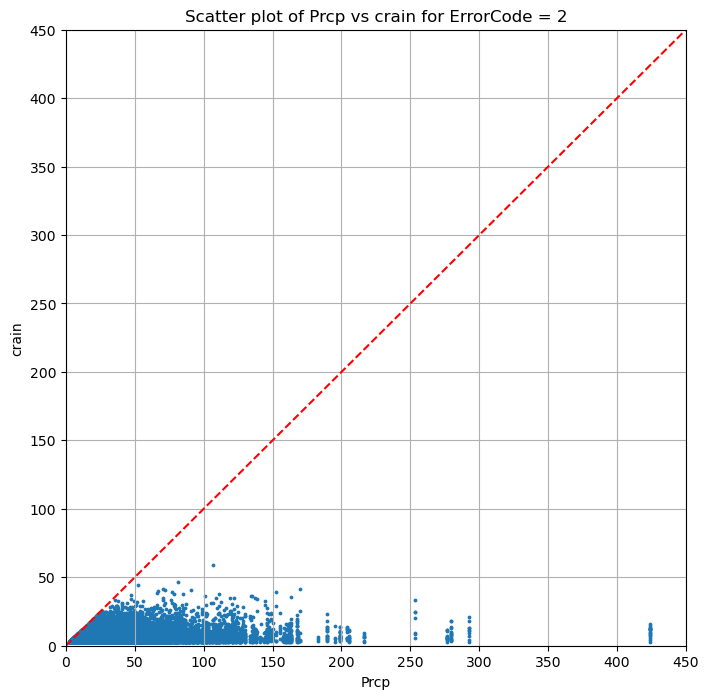

In [183]:
# 选出 ErrorCode 为 2 的行
error_rows_2 = HoursP_fix[HoursP_fix['ErrorCode'] == 2]

plt.figure(figsize=(8, 8))
plt.scatter(error_rows_2['Prcp'], error_rows_2['crain'], s=3)  # 调换 x 和 y 轴的顺序
plt.plot([0, 450], [0, 450], color='red', linestyle='--', label='x = y')  # 添加 x=y 的线
plt.title('Scatter plot of Prcp vs crain for ErrorCode = 2')  # 调整标题
plt.xlabel('Prcp')  # 调整 x 轴标签
plt.ylabel('crain')  # 调整 y 轴标签
plt.xlim(0, 450)  # 设置 x 轴范围
plt.ylim(0, 450)  # 设置 y 轴范围
plt.grid(True)
plt.show()

In [184]:
error_rows_2

,station,x,y,time,date,crain,Prcp,C_P,ErrorCode,SolvingCode
3768,56045,99.900000,33.966667,2008-06-06 00:00:00,2008-06-06,4.469716,9.3,-4.830284,2,0
3966,56045,99.900000,33.966667,2008-06-14 06:00:00,2008-06-14,3.623375,9.5,-5.876625,2,0
4142,56045,99.900000,33.966667,2008-06-21 14:00:00,2008-06-21,4.829402,6.9,-2.070598,2,0
4166,56045,99.900000,33.966667,2008-06-22 14:00:00,2008-06-22,2.777179,16.7,-13.922821,2,0
4167,56045,99.900000,33.966667,2008-06-22 15:00:00,2008-06-22,2.792292,16.7,-13.907708,2,0
...,...,...,...,...,...,...,...,...,...,...
14329902,56751,100.183333,25.700000,2016-02-24 10:00:00,2016-02-24,4.558269,11.6,-7.041730,2,0
14330658,56752,100.566667,25.833333,2016-01-27 11:00:00,2016-01-27,2.891554,10.1,-7.208446,2,0
14330659,56752,100.566667,25.833333,2016-01-27 12:00:00,2016-01-27,3.836135,10.1,-6.263865,2,0
14332758,56755,100.400000,25.383333,2016-02-24 12:00:00,2016-02-24,2.631946,6.4,-3.768054,2,0


In [185]:
# 提取

error_2_list = error_rows_2[['station','date']]

error_2_list

,station,date
3768,56045,2008-06-06
3966,56045,2008-06-14
4142,56045,2008-06-21
4166,56045,2008-06-22
4167,56045,2008-06-22
...,...,...
14329902,56751,2016-02-24
14330658,56752,2016-01-27
14330659,56752,2016-01-27
14332758,56755,2016-02-24


In [186]:
# 删除重复

error_2_list.drop_duplicates(subset=['station', 'date'], inplace=True)

error_2_list

/var/folders/qf/6td8xpjs0dx3h8n6_0_j266c0000gn/T/ipykernel_19797/2815192042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_2_list.drop_duplicates(subset=['station', 'date'], inplace=True)


,station,date
3768,56045,2008-06-06
3966,56045,2008-06-14
4142,56045,2008-06-21
4166,56045,2008-06-22
4214,56045,2008-06-24
...,...,...
14329229,56751,2016-01-27
14329902,56751,2016-02-24
14330658,56752,2016-01-27
14332758,56755,2016-02-24


In [187]:
# 将 error_2_list 中的 station 和 date 列作为条件，从 HoursP_fix 中提取符合条件的行
extracted_data = HoursP_fix.merge(error_2_list, on=['station', 'date'])

# 打印提取出的数据
extracted_data

,station,x,y,time,date,crain,Prcp,C_P,ErrorCode,SolvingCode
0,56045,99.900000,33.966667,2008-06-05 20:00:00,2008-06-06,1.016202,9.3,-8.283798,0,0
1,56045,99.900000,33.966667,2008-06-05 21:00:00,2008-06-06,0.405618,9.3,-8.894382,0,0
2,56045,99.900000,33.966667,2008-06-05 22:00:00,2008-06-06,0.000000,9.3,-9.300000,0,0
3,56045,99.900000,33.966667,2008-06-05 23:00:00,2008-06-06,0.000000,9.3,-9.300000,0,0
4,56045,99.900000,33.966667,2008-06-06 00:00:00,2008-06-06,4.469716,9.3,-4.830284,2,0
...,...,...,...,...,...,...,...,...,...,...
804076,56756,100.583333,25.483333,2016-02-24 15:00:00,2016-02-24,0.103326,6.9,-6.796674,0,0
804077,56756,100.583333,25.483333,2016-02-24 16:00:00,2016-02-24,0.437365,6.9,-6.462635,0,0
804078,56756,100.583333,25.483333,2016-02-24 17:00:00,2016-02-24,0.192145,6.9,-6.707855,0,0
804079,56756,100.583333,25.483333,2016-02-24 18:00:00,2016-02-24,0.172736,6.9,-6.727264,0,0


淘汰的低速代码 3分 57.5秒

```
import pandas as pd

# 假设 error_2_list 和 HoursP_merged 都是含有 'station' 和 'date' 列的 DataFrame

# 获取 error_2_list 中的 (station, date) 组合
error_combinations = error_2_list[['station', 'date']]

# 使用 isin() 方法过滤出符合条件的行
extracted_rows = HoursP_merged[HoursP_merged[['station', 'date']].apply(tuple, axis=1).isin(error_combinations.apply(tuple, axis=1))]

extracted_rows
```

In [188]:
extracted_data.to_csv( path / 'Error2_all.csv')

# 涉及 ErrorCode = 2 中 station 和 date 的所有行
# 下一步运算得到：
# Error2_all_valid_20_20.csv
# Error2_all_valid_DailySum.csv

In [190]:
Error2_all_valid_DailySum = pd.read_csv( path / 'Error2_all_valid_DailySum.csv')

# 将 station 列转换为字符串，保留整数部分
Error2_all_valid_DailySum['station'] = Error2_all_valid_DailySum['station'].astype(str).str.split('.').str[0]

# 将 DailyP 中的 station 列转换为字符串，保留整数部分
DailyP['station'] = DailyP['station'].astype(str).str.split('.').str[0]

# 将 date 列转换为日期格式
Error2_all_valid_DailySum['date'] = pd.to_datetime(Error2_all_valid_DailySum['date'])
DailyP['date'] = pd.to_datetime(DailyP['date'])

# 将 DailyP 中的 Prcp 值匹配到 Error2_all_valid_DailySum 中
Error2_all_valid_DailySum = pd.merge(Error2_all_valid_DailySum, DailyP, on=['station', 'date'], how='left')

Error2_all_valid_DailySum

,Unnamed: 0,station,date,crain,Prcp
0,0,55279,2008-05-21,4.060895,7.7
1,1,55279,2008-05-30,10.614720,4.4
2,2,55279,2008-06-18,3.865067,9.0
3,3,55279,2008-06-21,12.576464,4.7
4,4,55279,2008-07-01,8.052223,4.8
...,...,...,...,...,...
32268,32268,57105,2019-08-25,5.048207,6.6
32269,32269,57105,2019-08-26,14.365956,18.6
32270,32270,57105,2019-09-09,9.081680,15.8
32271,32271,57105,2019-09-12,52.669150,37.0


In [192]:
Error2_all_valid_DailySum.to_csv( path / 'Error2_all_valid_DailySum_merged_Prcp.csv')


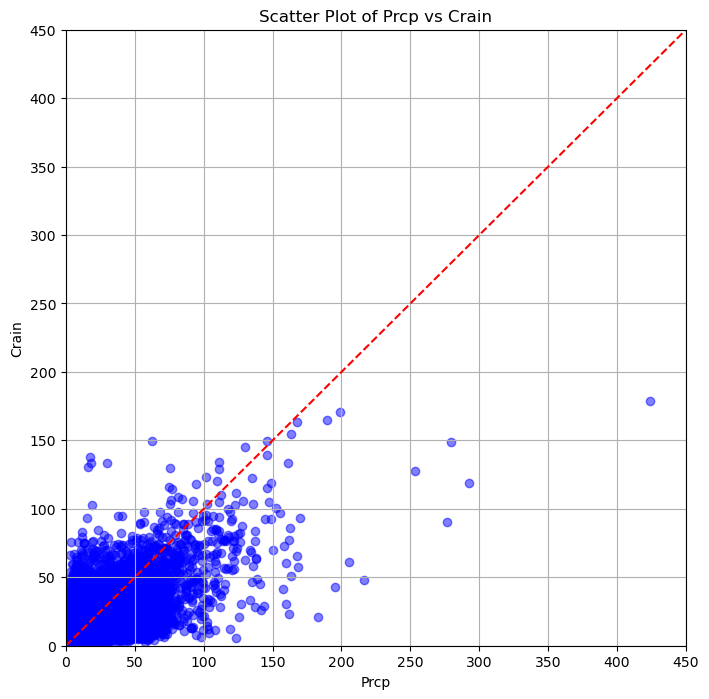

In [191]:
# 创建散点图
plt.figure(figsize=(8, 8))
plt.scatter(Error2_all_valid_DailySum['Prcp'], Error2_all_valid_DailySum['crain'], color='blue', alpha=0.5)  # 调换 x 轴和 y 轴的位置
plt.title('Scatter Plot of Prcp vs Crain')  # 调换 x 轴和 y 轴的标签
plt.xlabel('Prcp')  # 调换 x 轴和 y 轴的标签
plt.ylabel('Crain')  # 调换 x 轴和 y 轴的标签
plt.xlim(0, 450)  # 设置 x 轴范围
plt.ylim(0, 450)  # 设置 y 轴范围
plt.plot([0, 500], [0, 500], color='red', linestyle='--', label='x = y')  # 添加 x=y 的线
plt.grid(True)

In [194]:
from scipy.stats import pearsonr

# 计算相关系数和 p 值
correlation, p_value = pearsonr(Error2_all_valid_DailySum['crain'], Error2_all_valid_DailySum['Prcp'])

print("相关系数为:", correlation)
print("显著性 p 值为:", p_value)


相关系数为: 0.6402694199622123
显著性 p 值为: 0.0
